In [2]:
from bw_temporalis import easy_timedelta_distribution, easy_datetime_distribution, TemporalisLCA, Timeline, TemporalDistribution
from bw_temporalis.lcia import characterize_methane, characterize_co2
import bw2data as bd
import bw2calc as bc
import bw_graph_tools as graph
import numpy as np
import pandas as pd

In [3]:
bd.projects.set_current("Temporalis example project")

In [18]:
bd.Database('AGWP_multi_CO2').write({
    ('AGWP_multi_CO2', "CO2"): {
        "type": "emission",
        "name": "carbon dioxide",
        "temporalis code": "co2",
    },
    ('AGWP_multi_CO2', 'multi-pulse'): {
        'exchanges': [
            {
                'amount': 3,
                'input': ('AGWP_multi_CO2', 'CO2'),
                'temporal_distribution': TemporalDistribution(
                    np.array([0, 1, 50], dtype='timedelta64[Y]'),
                    np.ones(3) * 1/3
                ),
                'type': 'biosphere'
            },
        ],
        'name': 'multi-pulse',
        'type': 'process'
    }
})


09:44:45 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<?, ?it/s]


09:44:45 [info     ] Vacuuming database            


In [19]:
bd.Method(("GWP", "CF_CO2")).write([
    (('AGWP_multi_CO2', "CO2"), 1)
])

In [20]:
lca = bc.LCA({('AGWP_multi_CO2', 'multi-pulse'): 1}, ("GWP", "CF_CO2"))   #FU can be more than 1 thing !
lca.lci()
lca.lcia()

In [21]:
lca = TemporalisLCA(lca)

Starting graph traversal
Calculation count: 0


In [22]:
tl = lca.build_timeline()

In [23]:
tl.build_dataframe()
#shows inventory results

,date,amount,flow,activity
0,2024-11-15 08:44:48,1.0,5,6
1,2025-11-15 14:34:00,1.0,5,6
2,2074-11-15 11:44:48,1.0,5,6


In [24]:
bd.get_node(id=5)

'carbon dioxide' (None, None, None)

<Axes: xlabel='date', ylabel='amount'>

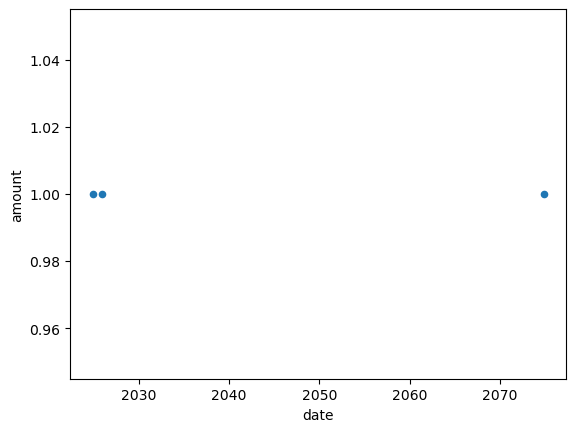

In [25]:
tl.df.plot(x="date", y="amount", kind="scatter")
#dynamic LCI

In [26]:
#Characterisation
characterized_df_co2 = tl.characterize_dataframe(
    characterization_function=characterize_co2, 
    flow={5},   #{bd.get_node(name="carbon dioxide").id}
)

<Axes: xlabel='date', ylabel='amount'>

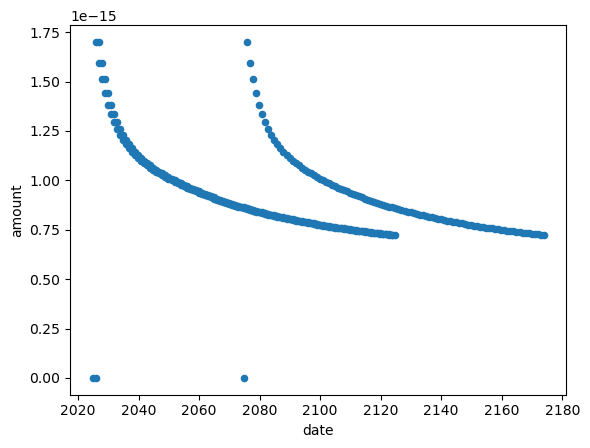

In [27]:
characterized_df_co2.plot(x="date", y="amount", kind="scatter")

<Axes: xlabel='date', ylabel='amount_sum'>

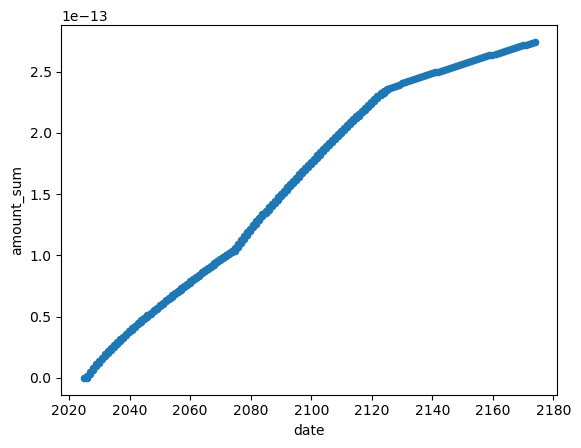

In [28]:
characterized_df_co2.plot(x="date", y="amount_sum", kind="scatter")

In [29]:
characterized_df_co2.amount_sum

0      0.000000e+00
1      0.000000e+00
2      1.700401e-15
3      3.296605e-15
4      4.997006e-15
           ...     
295    2.713694e-13
296    2.720977e-13
297    2.728242e-13
298    2.735491e-13
299    2.742722e-13
Name: amount_sum, Length: 300, dtype: float64

In [30]:
print('AGWP_100 =', characterized_df_co2.amount_sum[100], 'W.yr/m²')

AGWP_100 = 1.0481878885712324e-13 W.yr/m²
